## Demo

In [1]:
from dust import *
from halo import *

E = 2.0
N_H = 1e22
theta = 10

In [2]:
silicate = Silicate()
graphite = Graphite()

In [3]:
graphite.henke_F(E)

array(1.05688992)

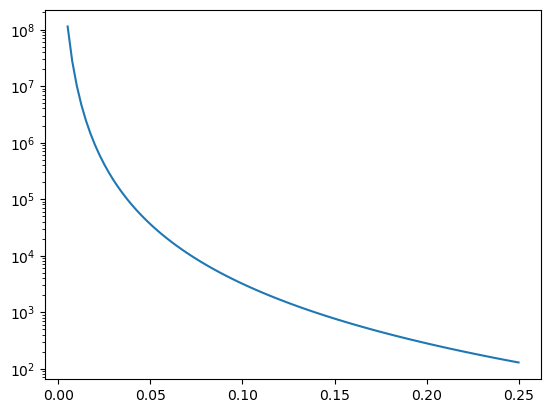

In [4]:
silicate.plot_size_func()

In [5]:
halo = Halo(N_H, E, [silicate,graphite])

In [6]:
halo.dust_I(silicate, 20)

0.020377524283098854

In [7]:
halo.dust_I(graphite, 20)

0.008036214296955146

In [8]:
halo.I(50)

0.009706000728089751

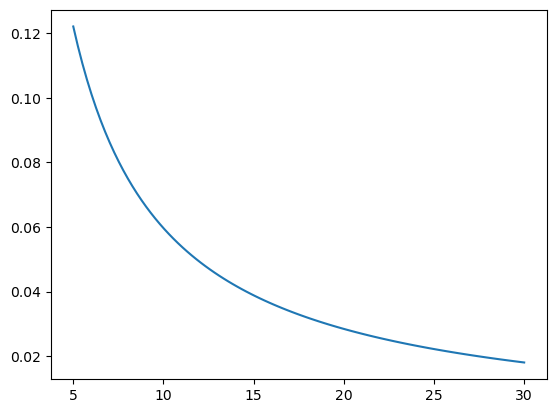

In [9]:
halo.plot_I()